## Getting started with neural networks

### Classifying movie reviews: A binary classification example

In [3]:
# Load the IMDB dataset
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# Decode the integer sequences via multi-hot encoding
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Vectorize the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# Vectorize the training and test labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
# Model definition
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer= 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
# Validating the approach
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train the model 
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20


2024-02-28 17:47:43.365859: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


30/30 [==============================] - 1s 28ms/step - loss: 0.5710 - accuracy: 0.7654 - val_loss: 0.4598 - val_accuracy: 0.8401
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3819 - accuracy: 0.8854 - val_loss: 0.3585 - val_accuracy: 0.8763
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2843 - accuracy: 0.9113 - val_loss: 0.3060 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 0s 10ms/step - loss: 0.2266 - accuracy: 0.9268 - val_loss: 0.2884 - val_accuracy: 0.8859
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1905 - accuracy: 0.9379 - val_loss: 0.3277 - val_accuracy: 0.8660
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1634 - accuracy: 0.9461 - val_loss: 0.2899 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1410 - accuracy: 0.9557 - val_loss: 0.2930 - val_accuracy: 0.8848
Epoch 8/20
30/30 [=========

In [7]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

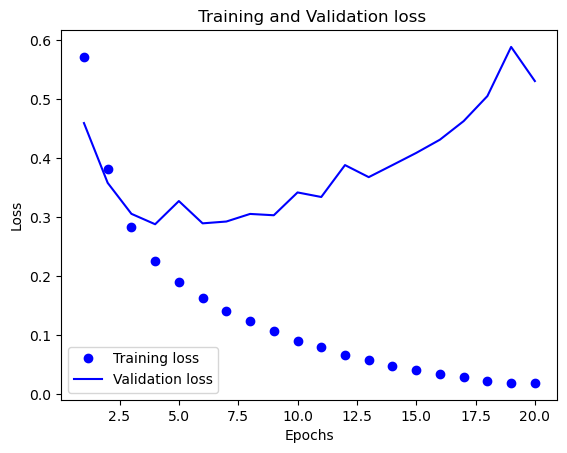

In [8]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1, len(loss_values) + 1)
plt.plot (epochs, loss_values, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title(' Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

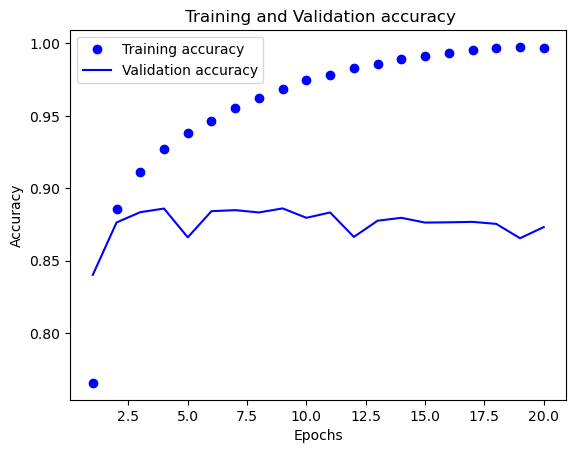

In [9]:
# Plot the training and validation accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range (1, len(loss_values) + 1)
plt.plot (epochs, acc, 'bo', label = 'Training accuracy')
plt.plot (epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title(' Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Retraining the model with less epochs to reduce overfitting
# Create the model
model = keras.Sequential([
    layers.Dense(16, activation = 'relu'),
    layers.Dense(16, activation = 'relu'),
    layers.Dense(1, activation = 'sigmoid')

])

# Compile the model
model.compile(optimizer= 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs = 4, batch_size= 512)

print(model.evaluate(x_test,y_test))

Epoch 1/4
49/49 [==============================] - 1s 6ms/step - loss: 0.4771 - accuracy: 0.8090
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2847 - accuracy: 0.9006
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.2225 - accuracy: 0.9217
Epoch 4/4
782/782 [==============================] - 1s 589us/step - loss: 0.2832 - accuracy: 0.8858
[0.28324902057647705, 0.8858000040054321]


In [11]:
# Generate new predictions
model.predict(x_test)

782/782 [==============================] - 0s 411us/step


array([[0.19319479],
       [0.9979563 ],
       [0.67049325],
       ...,
       [0.07919712],
       [0.06981897],
       [0.59776723]], dtype=float32)

The model is now confident for some samples (0.99 or more, or 0.01 or less), but less confident for others (0.28, 0.66)

## Classifying newswires: A multiclass classification example

In [28]:
# Load the Reuters dataset
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [29]:
# Encode the input data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [30]:
# Build the model
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

# Compile the model
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [31]:
# Create the validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = to_categorical(train_labels[:1000])
partial_y_train = to_categorical(train_labels[1000:])

In [16]:
# Train the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 14ms/step - loss: 2.8729 - accuracy: 0.3861 - val_loss: 1.9478 - val_accuracy: 0.5840
Epoch 2/20
16/16 [==============================] - 0s 11ms/step - loss: 1.6472 - accuracy: 0.6488 - val_loss: 1.4561 - val_accuracy: 0.6770
Epoch 3/20
16/16 [==============================] - 0s 10ms/step - loss: 1.2685 - accuracy: 0.7285 - val_loss: 1.2547 - val_accuracy: 0.7220
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 1.0555 - accuracy: 0.7722 - val_loss: 1.1357 - val_accuracy: 0.7520
Epoch 5/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8823 - accuracy: 0.8068 - val_loss: 1.0521 - val_accuracy: 0.7760
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.7463 - accuracy: 0.8354 - val_loss: 1.0063 - val_accuracy: 0.7750
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 0.6289 - accuracy: 0.8611 - val_loss: 0.9429 - val_accuracy: 0.7950
Epoch 8/20
16

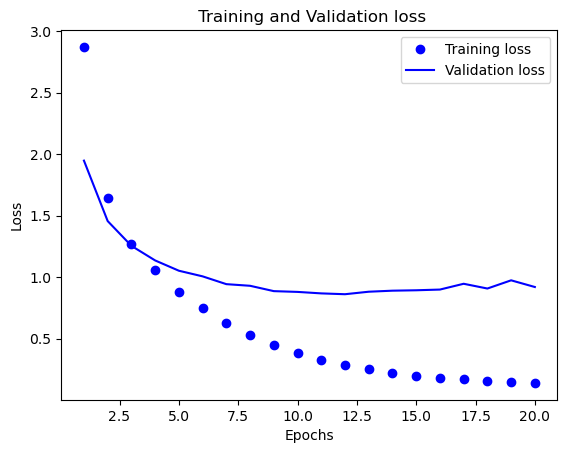

In [19]:
# Plot the training and validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range (1, len(loss) + 1)
plt.plot (epochs, loss, 'bo', label = 'Training loss')
plt.plot (epochs, val_loss, 'b', label = 'Validation loss')
plt.title(' Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

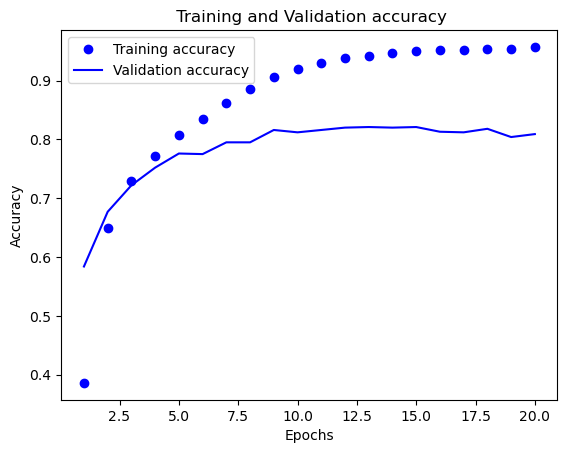

In [20]:
# Plot the training and validation accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range (1, len(loss_values) + 1)
plt.plot (epochs, acc, 'bo', label = 'Training accuracy')
plt.plot (epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title(' Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
# Retraining the model with less epochs to reduce overfitting
# Create the model
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'sigmoid')

])

# Compile the model
model.compile(optimizer= 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs = 9, batch_size= 512)

print(model.evaluate(x_test,y_test))

Epoch 1/9
18/18 [==============================] - 0s 13ms/step - loss: 2.5458 - accuracy: 0.5189
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4406 - accuracy: 0.6897
Epoch 3/9
18/18 [==============================] - 0s 10ms/step - loss: 1.1151 - accuracy: 0.7543
Epoch 4/9
18/18 [==============================] - 0s 10ms/step - loss: 0.9144 - accuracy: 0.8024
Epoch 5/9
18/18 [==============================] - 0s 9ms/step - loss: 0.7609 - accuracy: 0.8326
Epoch 6/9
18/18 [==============================] - 0s 10ms/step - loss: 0.6319 - accuracy: 0.8626
Epoch 7/9
18/18 [==============================] - 0s 10ms/step - loss: 0.5284 - accuracy: 0.8892
Epoch 8/9
18/18 [==============================] - 0s 10ms/step - loss: 0.4475 - accuracy: 0.9058
Epoch 9/9
71/71 [==============================] - 0s 851us/step - loss: 0.9196 - accuracy: 0.7939
[0.9196027517318726, 0.7938557267189026]


In this case, we have 46 classes and they may not be equally represented. Therefore, we will evaluate the accuracy of a random baseline to check this empirically.

In [22]:
# Check the accuracy of a random baseline
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19367764915405164

In [23]:
# Generate new predictions
model.predict(x_test)

71/71 [==============================] - 0s 830us/step


array([[2.70330207e-03, 1.63153708e-01, 6.84895366e-02, ...,
        4.53601358e-03, 2.33900058e-03, 3.95564036e-03],
       [4.65383902e-02, 6.86870754e-01, 8.44762087e-01, ...,
        6.90525174e-02, 8.75845202e-04, 2.51517165e-03],
       [2.91210383e-01, 9.94476676e-01, 1.47887781e-01, ...,
        5.43713272e-02, 1.21470494e-02, 1.01947308e-01],
       ...,
       [1.03232265e-01, 4.40023184e-01, 1.88806087e-01, ...,
        2.54756957e-02, 3.89618278e-02, 6.07977211e-02],
       [2.87502091e-02, 8.37240636e-01, 2.29145482e-01, ...,
        1.31011074e-02, 1.39585193e-02, 3.76142859e-02],
       [4.26802605e-01, 9.31859434e-01, 3.89939517e-01, ...,
        5.66596985e-02, 5.48679661e-03, 3.75451818e-02]], dtype=float32)

### The importance of having sufficiently large intermediate layers

In [24]:
# A model with an information bottleneck
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(4, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 8ms/step - loss: 3.3241 - accuracy: 0.1560 - val_loss: 2.7943 - val_accuracy: 0.2370
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 2.4344 - accuracy: 0.2518 - val_loss: 2.0946 - val_accuracy: 0.2600
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 1.7719 - accuracy: 0.5625 - val_loss: 1.5690 - val_accuracy: 0.6530
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 1.3977 - accuracy: 0.6780 - val_loss: 1.3951 - val_accuracy: 0.6720
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 1.2295 - accuracy: 0.6939 - val_loss: 1.3236 - val_accuracy: 0.6720
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 1.1083 - accuracy: 0.7047 - val_loss: 1.2812 - val_accuracy: 0.6780
Epoch 7/20
63/63 [==============================] - 0s 7ms/step - loss: 1.0079 - accuracy: 0.7357 - val_loss: 1.2417 - val_accuracy: 0.7070
Epoch 8/20
63/63 [==

### Trying to improve the model (Section 4.2.8)

In [25]:
# Trying a model with one 128 layer
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 1.8490 - accuracy: 0.6186 - val_loss: 1.2214 - val_accuracy: 0.7120
Epoch 2/20
63/63 [==============================] - 0s 6ms/step - loss: 0.9747 - accuracy: 0.7830 - val_loss: 1.0127 - val_accuracy: 0.7950
Epoch 3/20
63/63 [==============================] - 0s 6ms/step - loss: 0.6654 - accuracy: 0.8552 - val_loss: 0.9123 - val_accuracy: 0.8080
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4641 - accuracy: 0.9007 - val_loss: 0.8690 - val_accuracy: 0.8170
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.9252 - val_loss: 0.8740 - val_accuracy: 0.8230
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2597 - accuracy: 0.9405 - val_loss: 0.9442 - val_accuracy: 0.7960
Epoch 7/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2186 - accuracy: 0.9465 - val_loss: 0.8874 - val_accuracy: 0.8260
Epoch 8/20
63/63 [==

Validation accuracy increased by 8%

In [26]:
# Trying a model with two 128 layers
model = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 10ms/step - loss: 1.5981 - accuracy: 0.6614 - val_loss: 1.1057 - val_accuracy: 0.7460
Epoch 2/20
63/63 [==============================] - 1s 10ms/step - loss: 0.8002 - accuracy: 0.8161 - val_loss: 0.8816 - val_accuracy: 0.8130
Epoch 3/20
63/63 [==============================] - 1s 10ms/step - loss: 0.4885 - accuracy: 0.8955 - val_loss: 0.8502 - val_accuracy: 0.8070
Epoch 4/20
63/63 [==============================] - 1s 8ms/step - loss: 0.3281 - accuracy: 0.9280 - val_loss: 0.8095 - val_accuracy: 0.8300
Epoch 5/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2458 - accuracy: 0.9434 - val_loss: 0.8676 - val_accuracy: 0.8260
Epoch 6/20
63/63 [==============================] - 1s 10ms/step - loss: 0.2057 - accuracy: 0.9478 - val_loss: 0.9707 - val_accuracy: 0.7990
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 0.1825 - accuracy: 0.9524 - val_loss: 0.9324 - val_accuracy: 0.8030
Epoch 8/20
63/6

Not a significant increase in validation accuracy.

In [32]:
# Trying a model with one 32 layer
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 6ms/step - loss: 2.0459 - accuracy: 0.5822 - val_loss: 1.3597 - val_accuracy: 0.6980
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 1.0958 - accuracy: 0.7631 - val_loss: 1.0670 - val_accuracy: 0.7540
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.7790 - accuracy: 0.8309 - val_loss: 0.9446 - val_accuracy: 0.7980
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.5735 - accuracy: 0.8752 - val_loss: 0.8763 - val_accuracy: 0.8080
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4274 - accuracy: 0.9093 - val_loss: 0.8661 - val_accuracy: 0.8170
Epoch 6/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3340 - accuracy: 0.9295 - val_loss: 0.8590 - val_accuracy: 0.8210
Epoch 7/20
63/63 [==============================] - 0s 5ms/step - loss: 0.2669 - accuracy: 0.9412 - val_loss: 0.9175 - val_accuracy: 0.8120
Epoch 8/20
63/63 [==

In [33]:
# Trying a model with two 32 layers
model = keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 0s 5ms/step - loss: 2.2491 - accuracy: 0.5172 - val_loss: 1.4248 - val_accuracy: 0.6850
Epoch 2/20
63/63 [==============================] - 0s 4ms/step - loss: 1.2021 - accuracy: 0.7273 - val_loss: 1.1472 - val_accuracy: 0.7400
Epoch 3/20
63/63 [==============================] - 0s 4ms/step - loss: 0.9064 - accuracy: 0.8002 - val_loss: 1.0197 - val_accuracy: 0.7790
Epoch 4/20
63/63 [==============================] - 0s 3ms/step - loss: 0.7032 - accuracy: 0.8495 - val_loss: 0.9664 - val_accuracy: 0.7840
Epoch 5/20
63/63 [==============================] - 0s 4ms/step - loss: 0.5518 - accuracy: 0.8817 - val_loss: 0.8975 - val_accuracy: 0.7970
Epoch 6/20
63/63 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.9072 - val_loss: 0.8907 - val_accuracy: 0.8190
Epoch 7/20
63/63 [==============================] - 0s 4ms/step - loss: 0.3530 - accuracy: 0.9237 - val_loss: 0.9020 - val_accuracy: 0.8070
Epoch 8/20
63/63 [==

*Using a single intermediate layer*

In [34]:
# Trying a model with a single intermediate layer of 64 units
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 20,
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 7ms/step - loss: 1.9085 - accuracy: 0.6257 - val_loss: 1.2388 - val_accuracy: 0.7360
Epoch 2/20
63/63 [==============================] - 0s 5ms/step - loss: 0.9872 - accuracy: 0.7964 - val_loss: 0.9924 - val_accuracy: 0.8020
Epoch 3/20
63/63 [==============================] - 0s 5ms/step - loss: 0.6859 - accuracy: 0.8572 - val_loss: 0.8747 - val_accuracy: 0.8190
Epoch 4/20
63/63 [==============================] - 0s 5ms/step - loss: 0.4980 - accuracy: 0.8953 - val_loss: 0.8287 - val_accuracy: 0.8280
Epoch 5/20
63/63 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.9206 - val_loss: 0.7970 - val_accuracy: 0.8310
Epoch 6/20
63/63 [==============================] - 0s 6ms/step - loss: 0.2934 - accuracy: 0.9354 - val_loss: 0.7840 - val_accuracy: 0.8270
Epoch 7/20
63/63 [==============================] - 1s 9ms/step - loss: 0.2446 - accuracy: 0.9434 - val_loss: 0.7860 - val_accuracy: 0.8340
Epoch 8/20
63/63 [==

In [37]:
# Trying a model with a single intermediate layer of 128 units
model = keras.Sequential([
    layers.Dense(128, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 5, # I believe the model starts overfitting after 5 epochs
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/5
63/63 [==============================] - 1s 10ms/step - loss: 1.6310 - accuracy: 0.6760 - val_loss: 1.0794 - val_accuracy: 0.7600
Epoch 2/5
63/63 [==============================] - 0s 7ms/step - loss: 0.7799 - accuracy: 0.8329 - val_loss: 0.8698 - val_accuracy: 0.8090
Epoch 3/5
63/63 [==============================] - 0s 7ms/step - loss: 0.4978 - accuracy: 0.8990 - val_loss: 0.8094 - val_accuracy: 0.8340
Epoch 4/5
63/63 [==============================] - 0s 7ms/step - loss: 0.3491 - accuracy: 0.9251 - val_loss: 0.7802 - val_accuracy: 0.8380
Epoch 5/5
63/63 [==============================] - 0s 8ms/step - loss: 0.2638 - accuracy: 0.9387 - val_loss: 0.7846 - val_accuracy: 0.8320


In [40]:
# Trying a model with a single intermediate layer of 32 units
model = keras.Sequential([
    layers.Dense(32, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 7, # I believe the model starts overfitting after 7 epochs
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/7
63/63 [==============================] - 0s 4ms/step - loss: 2.1514 - accuracy: 0.6171 - val_loss: 1.4390 - val_accuracy: 0.6830
Epoch 2/7
63/63 [==============================] - 0s 4ms/step - loss: 1.1927 - accuracy: 0.7483 - val_loss: 1.1225 - val_accuracy: 0.7570
Epoch 3/7
63/63 [==============================] - 0s 4ms/step - loss: 0.8963 - accuracy: 0.8057 - val_loss: 0.9875 - val_accuracy: 0.7880
Epoch 4/7
63/63 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.8537 - val_loss: 0.9115 - val_accuracy: 0.8100
Epoch 5/7
63/63 [==============================] - 0s 3ms/step - loss: 0.5664 - accuracy: 0.8870 - val_loss: 0.8551 - val_accuracy: 0.8150
Epoch 6/7
63/63 [==============================] - 0s 3ms/step - loss: 0.4605 - accuracy: 0.9065 - val_loss: 0.8251 - val_accuracy: 0.8150
Epoch 7/7
63/63 [==============================] - 0s 3ms/step - loss: 0.3777 - accuracy: 0.9221 - val_loss: 0.8022 - val_accuracy: 0.8240


*Using 3 intermediate layers*

In [43]:
# Trying a model with three intermediate layers of 64 units
model = keras.Sequential([
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop',
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

model.fit(partial_x_train,
            partial_y_train,
            epochs = 8, # I believe the model starts overfitting after 8 epochs
            batch_size = 128,
            validation_data = (x_val, y_val))

Epoch 1/8
63/63 [==============================] - 1s 9ms/step - loss: 1.9502 - accuracy: 0.5695 - val_loss: 1.3370 - val_accuracy: 0.7090
Epoch 2/8
63/63 [==============================] - 0s 5ms/step - loss: 1.1014 - accuracy: 0.7526 - val_loss: 1.0520 - val_accuracy: 0.7660
Epoch 3/8
63/63 [==============================] - 0s 5ms/step - loss: 0.7581 - accuracy: 0.8272 - val_loss: 1.0168 - val_accuracy: 0.7610
Epoch 4/8
63/63 [==============================] - 0s 5ms/step - loss: 0.5330 - accuracy: 0.8776 - val_loss: 0.9746 - val_accuracy: 0.7810
Epoch 5/8
63/63 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.9167 - val_loss: 0.9058 - val_accuracy: 0.8070
Epoch 6/8
63/63 [==============================] - 0s 5ms/step - loss: 0.2916 - accuracy: 0.9362 - val_loss: 0.9595 - val_accuracy: 0.7910
Epoch 7/8
63/63 [==============================] - 0s 5ms/step - loss: 0.2347 - accuracy: 0.9456 - val_loss: 1.0031 - val_accuracy: 0.8050
Epoch 8/8
63/63 [==========

### Predicting house prices: A regression example

In [44]:
# Load the Boston housing dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [46]:
# Normalize the data
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std
test_data -= mean
test_data /= std

In [52]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The targets are the median values of owner-occupied homes, in thousand of dollars. The prices are typically between $10000 and $50000.

In [47]:
# Build the model
def build_model(): # Because we will need to instantiate the same model multiple times, we use a function to construct it
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    model.compile(optimizer = 'rmsprop',
                  loss = 'mse',
                  metrics = ['mae'])
    return model

We will use k-fold validation instead of regular validation because splitting the already small data in a validation set would cause the validation scores to fluctuate.

In [49]:
# K-fold validation
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f'processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepare the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0) # Prepare the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis = 0)
    model = build_model() # Build the Keras model (already compiled)
    model.fit(partial_train_data, partial_train_targets, epochs = num_epochs, batch_size = 1, verbose = 0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0) # Evaluate the model on the validation data
    all_scores.append(val_mae)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


In [51]:
print(all_scores)
print(np.mean(all_scores))

[2.6523659229278564, 2.4676973819732666, 2.5649986267089844, 2.3816168308258057]
2.5166696906089783


This means that we are off by $2600, on average, which is significant since th eprices range from $10000 and $50000.

In [53]:
# Saving the validation logs at each fold
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f'processing fold #{i}')
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] # Prepare the validation data: data from partition #k
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis = 0) # Prepare the training data: data from all other partitions
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis = 0)
    model = build_model() # Build the Keras model (already compiled)
    history = model.fit(partial_train_data, partial_train_targets, validation_data = (val_data, val_targets), epochs = num_epochs, batch_size = 1, verbose = 0) # Train the model (in silent mode, verbose = 0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold #0
processing fold #1
processing fold #2
processing fold #3


Validation MAE stops improving significantly after 120- 140 epochs. Past that point, we start overfitting.

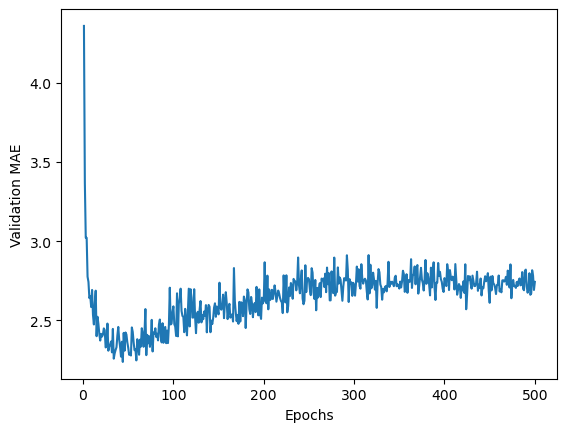

In [54]:
# Building the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

# Plotting validation scores
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [56]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
test_mae_score

4/4 [==============================] - 0s 813us/step - loss: 17.9479 - mae: 2.5868


2.5868046283721924

In [58]:
# Generate new predictions
predictions = model.predict(test_data)
predictions[0]

4/4 [==============================] - 0s 1ms/step


array([8.310929], dtype=float32)

With this scalar regression model, predict() returns the model's guess for the sample's price in thousand of dollars. The first house in the test set is predicted to have a price of about $8000.